In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants

%matplotlib inline


#définition des constantes nécessaires
pi = constants.pi #pi
r_e = 2.8179403262e-13 #rayon classique de l'électron en cm
m_e = constants.physical_constants["electron mass energy equivalent in MeV"][0] #Masse de l'électron en MeV (Le c^2 est inclu dans la valeur de la masse)
m_p = constants.physical_constants["proton mass energy equivalent in MeV"][0] #Masse du proton en MeV (Le c^2 est inclu dans la valeur de la masse)
rho_eau = 1 #densité de l'eau (de PSTAR) en g/cm^3
rho_os = 1.85 #densité de l'os cortical (de PSTAR) en g/cm^3
I_eau = 0.000075 #énergie moyenne d'excitation de l'eau (de PSTAR) en MeV
I_os = 0.0001064 #énergie moyenne d'excitation de l'os cortical (de PSTAR) en MeV

## Question 1

Selon la recherche, la gamme d'énergie cinétique des protons en protonthérapie varie entre 70 MeV et 250 MeV. La plus grande énergie utilisée est 250 MeV. Pour exprimer $\gamma (\beta)$ et $\gamma (T)$, nous devons faire de l'algèbre simple avec les équations de la dynamique des particules:

$$
\begin{align*}
    T &= (\gamma - 1)m_pc^2 \\ 
    \gamma(T) &= \frac{T}{m_pc^2} + 1
\end{align*}
$$
Où $m_p$ sera la masse du proton puisque c'est la vitesse des protons que l'ont étudiera en protonthérapie.

Pour $\gamma (\beta)$, nous savons que $\beta \equiv \frac{v}{c}$;
$$\gamma = \sqrt{\frac{1}{1 - \beta^2}}$$

De plus, on sait que:
$$
\begin{align*}
    \beta = \sqrt{1-\frac{1}{\gamma^2}}
\end{align*}
$$


## Question 2

* Trouver comment exprimer la densité électronique $n_e$ en fonction de la composition atomique (Z?) et de $\rho$
* Calculer les densités électroniques de l'eau et de l'os cortical?
* Tracer les courbes de stopping power à partir de PSTAR

Par définition, on sait que la densité électronique est définie par le nombre d'électrons par gramme divisé par le volume:
$$
\begin{align*}
    n_e &= \frac{N}{V}
\end{align*}
$$
On peut développer le tout par les définitions usuelles.
$$
\begin{align*}
    n_e &= \frac{N}{V} = \frac{Z N_{atomes}}{\frac{m_{atomes}}{\rho}} = \frac{Z N_{atomes}\rho}{m_{atomes}}
\end{align*}
$$



5.8077993123458934e+23
3.342838276571907e+23


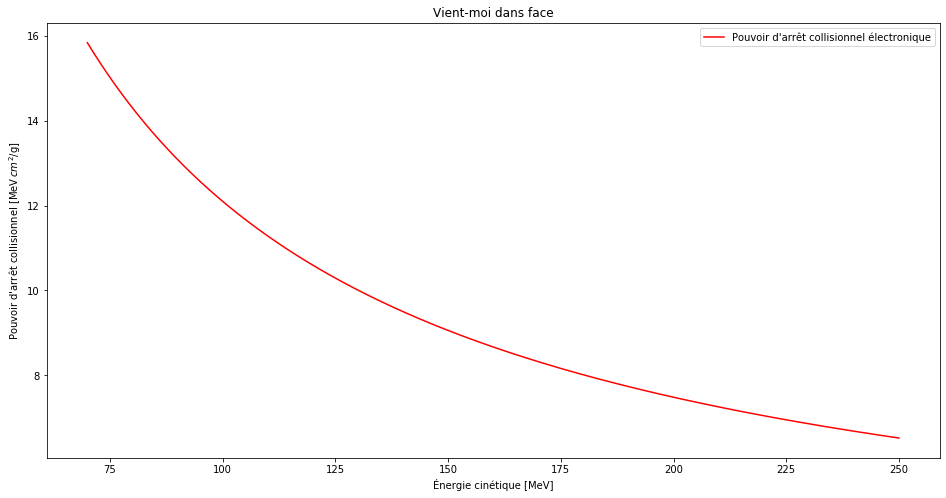

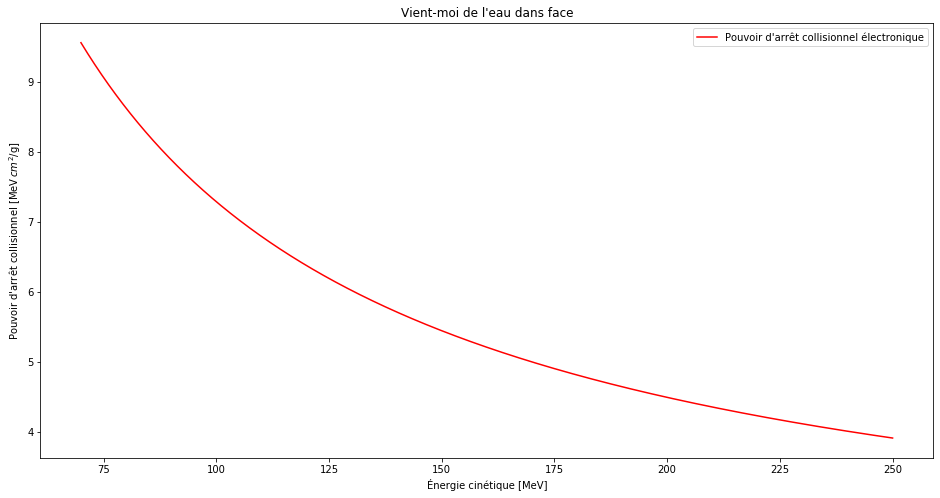

In [43]:
#La classe Milieu accepte comme arguments la densité volumique (rho), la fraction de chaque éléments du milieu en ordre,
#le numéro atomique (Z) dans le même ordre, et la masse molaire (mmol) aussi en ordre. 
class Milieu:
    def __init__(self, rho, frac = [], Z = [], mmol = []):
        self.rho = rho
        self.frac = frac
        self.Z = Z
        self.mmol = mmol

#La fonction edensite donne la densité électronique du milieu.
    def edensite(self):
        n = 0
        for i in range(0, len(self.mmol)):
            n += (self.rho*self.frac[i]*self.Z[i]*(6.022*10**23))/self.mmol[i]
        return n
        
        
frac_os = [0.047234, 0.144330, 0.041990, 0.446096, 0.002200, 0.104970, 0.003150, 0.209930, 0.000100]
Z_os = [1,6,7,8,12,15,16,20,30]
mmol_os = [1.00784, 12.0107, 14.0067, 15.999, 24.305, 30.9738, 32.065, 40.078, 65.38]

os = Milieu(rho_os, frac = frac_os, Z=Z_os, mmol = mmol_os)
eau = Milieu(rho_eau, frac = [0.111894, 0.888106], Z = [1,8], mmol = [1.00784 ,15.999])

ne_os = os.edensite()
ne_eau = eau.edensite()
print(ne_os)
print(ne_eau)

def gamma(T):
    return (T/m_p) + 1

def beta(T):
    return np.sqrt(1-(1/(gamma(T)**2)))

def Te_max(T):
    return 2*m_e*((gamma(T)**2) - 1)/(1 + 2*(gamma(T))*(m_e/m_p) + (m_e/m_p)**2)

def plot(n_e, I, titre):
    x = np.linspace(70,250,3000)
    fct = 2*pi*(r_e**2)*m_e*n_e*(1/(beta(x)**2))*(np.log(2*m_e*(beta(x)**2)*(gamma(x)**2)*(Te_max(x))/(I**2)) -2*(beta(x)**2))
    plt.figure(figsize=(16,8))
    plt.plot(x, fct, 'r-', label="Pouvoir d'arrêt collisionnel électronique")
    plt.xscale("log")
    plt.xlabel("Énergie cinétique [MeV]")
    plt.ylabel(r"Pouvoir d'arrêt collisionnel [MeV$\,cm^2$/g]")
    plt.legend()
    plt.title(titre)
    plt.show()

plot(ne_os, I_os, "Vient-moi dans face")
plot(ne_eau, I_eau, "Vient-moi de l'eau dans face")

## Question 3

On doit s'assurer de l'homogénéité dimensionnelle dans l'équation de la porté dans l'approximation CSDA:
$$\begin{align*}
    R_{CSDA} &= \int_0^{T_i} \frac{\text{d}T'}{\frac{S_{col}}{\rho}}\\
    R_{CSDA}\left[ \text{g}/\text{cm}^2 \right] &= \int_0^{T_i} \frac{\text{d}T'\left[ \text{MeV} \right]}{\frac{S_{col}}{\rho}\left[\text{MeV}/\text{g}/\text{cm}^2\right]}\\
    R_{CSDA}\left[ \text{g}/\text{cm}^2 \right] &= \int_0^{T_i} \frac{\text{d}T'}{\frac{S_{col}}{\rho}}\left[\text{g}/\text{cm}^2 \right]\\
\end{align*}
$$

Qui est bien ce qu'on devait vérifier.

## Question 4

Dans notre cas, puisqu'on étudie le pouvoir d'arrêt collisionnel d'un proton qui est ralenti par les électrons dans de la matière, on sait que l'on étudie le pouvoir d'arrêt collisionnel électronique.

On peut donc récupérer les données du PSTAR pour le pouvoir d'arrêt collisionel du proton dans l'eau liquide puis dans l'os cortical, et comparer, dans chacun, le pouvoir d'arrêt collisionel électronique avec le pouvoir d'arrêt total sur une plage de 70 à 250 MeV.

On comparera le tout graphiquement avec matplotlib.

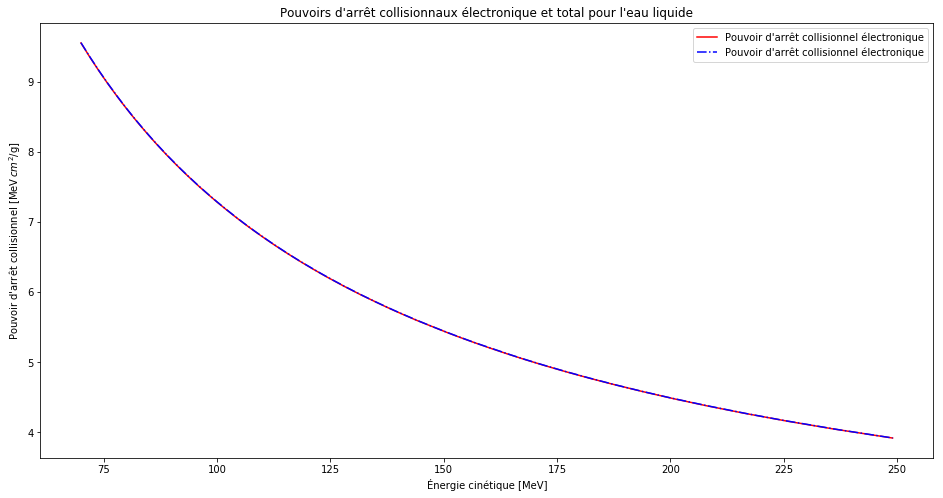

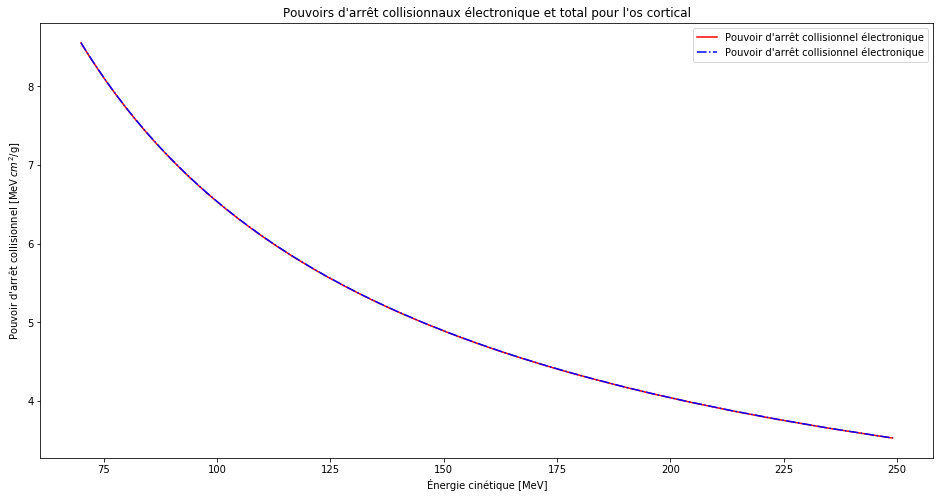

In [55]:
def plot_S_col_PSTAR(nom_de_fichier, titre):
    plt.figure(figsize=(16,8))
    plt.plot(fichier[:,0], fichier[:, 1], 'r-', label="Pouvoir d'arrêt collisionnel électronique")
    plt.plot(fichier[:,0], fichier[:, 2], 'b-.', label="Pouvoir d'arrêt collisionnel électronique")
    plt.xlabel("Énergie cinétique [MeV]")
    plt.ylabel(r"Pouvoir d'arrêt collisionnel [MeV$\,cm^2$/g]")
    plt.legend()
    plt.title(titre)
    plt.show()
    
plot_S_col_PSTAR("S_col_PSTAR_70-250_eau.txt", "Pouvoirs d'arrêt collisionnaux électronique et total pour l'eau liquide")
plot_S_col_PSTAR("S_col_PSTAR_70-250_os.txt", "Pouvoirs d'arrêt collisionnaux électronique et total pour l'os cortical")

On voit très bien sur les deux graphiques que le pouvoir d'arrêt collisionnel total est très bien approximé par le pouvoir d'arrêt collisionnel électronique dans la plage d'énergie clinique.

## Question 5

Il suffit d'insérer l'intégrale dans Wolfram Alpha pour voir que celle-ci n'est pas analytique. Il est donc nécessaire d'utiliser une méthode numérique puisqu'il n'y a pas d'autres moyens d'obtenir un résultat.

## Question 6

* Écrire une méthode de résolution avec la méthode des trapèzes (easy)
* La rendre adaptative (faire en sorte qu'elle ajuste elle-même le nombre de tranches (N)) (hard)

Il sera premièrement extrêmement pertinent d'écrire nos fonctions sous forme _Python_:

In [107]:
def gamma(T):
    return T/(m_p) + 1

def beta(T):
    return np.sqrt(1-(1/(gamma(T)**2)))

def Te_max(T):
    return (2*m_e*(gamma(T)**2-1))/(1+2*gamma(T)*(m_e/m_p)+(m_e/m_p)**2)

def S_col(T, I, n_e):
    return 2*pi*r_e**2*m_e*n_e*(1/beta(T)**2)*(np.log( (2*m_e*beta(T)**2*gamma(T)**2*Te_max(T))/(I)**2 )-2*beta(T)**2)

def integrande_de_R(T, I, n_e, rho):
    return rho/S_col(T, I, n_e)

#J'ai défini les fonctions qu'on aura besoin, il reste juste à faire le gros de la job

def trapezes(a, b, N, I, n_e, rho):
    h = (b-a)/N
    somme = 0
    for k in range(1,N):
        somme += integrande_de_R(a+k*h, I, n_e, rho)
        
    resultat = h*((1/2)*integrande_de_R(a, I, n_e, rho) + (1/2)*integrande_de_R(b, I, n_e, rho) + somme)
    return resultat

def trapz2(f,a,b,N=50):
    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

S_c_eau = lambda x: integrande_de_R(x, I_eau, ne_water, 1)

13.934912943086832
0.06806360171206505


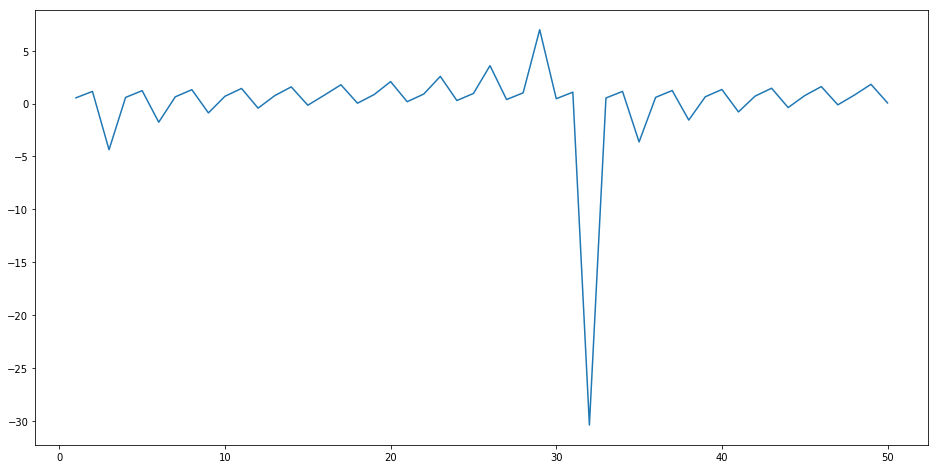

In [113]:
#cellule de tests

print(trapezes(4, 1000, 300, I_eau, ne_water, 1))
print(trapz2(S_c_eau ,3,100, 50))

lin_N = np.linspace(1,50, 50)
gwochefbandi = np.zeros(len(lin_N))
for i in lin_N:
    
    gwochefbandi[int(i-1)] = trapz2( S_c_eau, 3, 100, int(i))
    
plt.figure(figsize=(16,8))
plt.plot(lin_N, gwochefbandi)
#plt.ylim(0, 16)
plt.show()

#C'est le bon ordre de grandeur yay

## Question 7

## Question 8

## Question 9

## Question 10

## Question 11

## Question 12

## Question 13

## Question 14